<a href="https://colab.research.google.com/github/nallagondu/-deep_learning/blob/master/Global-geogropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install geopandas
!pip install earthpy 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 2.1 MB/s 
     |████████████████████████████████| 6.3 MB 54.9 MB/s 
     |████████████████████████████████| 16.7 MB 44.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 2.1 MB/s 
     |████████████████████████████████| 19.3 MB 449 kB/s 


In [8]:
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


In [9]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

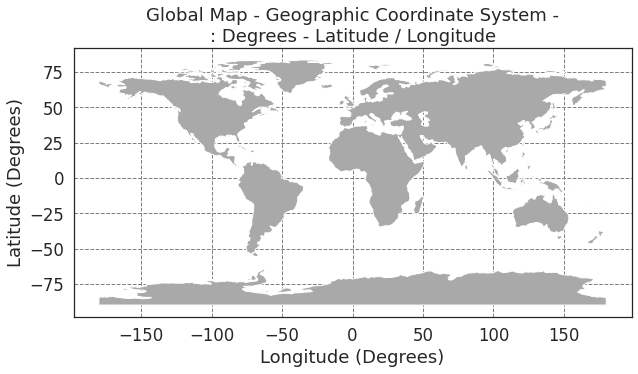

In [11]:
# Plot worldBound data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System -\n: Degrees - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')

In [12]:
# Create numpy array of x,y point locations
add_points = np.array([[-105.2519,   40.0274], 
                       [  10.75  ,   59.95  ], 
                       [   2.9833,   39.6167]])

# Turn points into list of x,y shapely points 
city_locations = [Point(xy) for xy in add_points]
city_locations

In [13]:
# Create geodataframe using the points
city_locations = gpd.GeoDataFrame(city_locations, 
                                  columns=['geometry'],
                                  crs=worldBound.crs)
city_locations.head(3)

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)
